# Proyek Analisis Data: E-commerce
- **Nama:** Yogi Kautsar Alnandeta
- **Email:** yogikautsa@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis:



- Tren Penjualan Berdasarkan Kategori Produk
- Apa produk yang paling banyak dibeli di setiap musim?

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
customers = pd.read_csv("drive/MyDrive/dataset/customers_dataset.csv")
order_items = pd.read_csv("drive/MyDrive/dataset/order_items_dataset.csv")
order_payments = pd.read_csv("drive/MyDrive/dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("drive/MyDrive/dataset/order_reviews_dataset.csv")
orders = pd.read_csv("drive/MyDrive/dataset/orders_dataset.csv")
product_category = pd.read_csv("drive/MyDrive/dataset/product_category_name_translation.csv")
products = pd.read_csv("drive/MyDrive/dataset/products_dataset.csv")
sellers = pd.read_csv("drive/MyDrive/dataset/sellers_dataset.csv")

Insight


---
- Dataset berhasil dimuat tanpa error.
- Data memiliki berbagai informasi pelanggan, pesanan, dan pembayaran.

###Assessing Data

In [4]:
customers.info()
orders.info()
order_items.info()
order_payments.info()
order_reviews.info()
products.info()
sellers.info()
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

In [5]:
def assess_outliers_iqr(df, column_name):
    """
    Mendeteksi outlier menggunakan metode IQR.

    Args:
        df (pd.DataFrame): DataFrame yang akan dianalisis.
        column_name (str): Nama kolom numerik yang akan dianalisis.
    """
    if column_name not in df.columns:
        print(f"Kolom '{column_name}' tidak ditemukan di DataFrame.")
        return

    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Kolom '{column_name}' bukan kolom numerik.")
        return

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Outliers untuk kolom '{column_name}':")
    print(outliers)
    print(f"Jumlah Outlier: {len(outliers)}")
    print("-" * 40)

# Customers
if 'customers' in locals():
    assess_outliers_iqr(customers, 'customer_zip_code_prefix')

# Orders
if 'orders' in locals():
    print("Orders tidak memiliki kolom numerik yang relevan untuk IQR")

# Order Items
if 'order_items' in locals():
    assess_outliers_iqr(order_items, 'price')
    assess_outliers_iqr(order_items, 'freight_value')

# Order Payments
if 'order_payments' in locals():
    assess_outliers_iqr(order_payments, 'payment_value')

# Order Reviews
if 'order_reviews' in locals():
    assess_outliers_iqr(order_reviews, 'review_score')

# Products
if 'products' in locals():
    assess_outliers_iqr(products, 'product_weight_g')
    assess_outliers_iqr(products, 'product_length_cm')
    assess_outliers_iqr(products, 'product_height_cm')
    assess_outliers_iqr(products, 'product_width_cm')

# Sellers
if 'sellers' in locals():
    assess_outliers_iqr(sellers, 'seller_zip_code_prefix')

# Product Category
if 'product_category' in locals():
    print("Product Category tidak memiliki kolom numerik yang relevan untuk IQR")


Outliers untuk kolom 'customer_zip_code_prefix':
Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []
Jumlah Outlier: 0
----------------------------------------
Orders tidak memiliki kolom numerik yang relevan untuk IQR
Outliers untuk kolom 'price':
                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
16      0009c9a17f916a706d71784483a5d643              1   
26      0011d82c4b53e22e84023405fb467e57              1   
30      00137e170939bba5a3134e2386413108              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
112586  ffdc5e3279114c523a09296f8fd28331              1   
112592  ffde92ba447b33a47d1c04d203f10f41              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302

Insight

---
- Terdapat beberapa missing values di kolom `order_approved_at` dan `order_delivered_carrier_date`.
- Beberapa kolom memiliki tipe data yang perlu dikonversi.


###Cleaning Data

In [6]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['season'] = orders['order_purchase_timestamp'].dt.month % 12 // 3 + 1
season_labels = {1: "Musim Dingin", 2: "Musim Semi", 3: "Musim Panas", 4: "Musim Gugur"}
orders['season'] = orders['season'].map(season_labels)
filtered_orders = orders[orders['order_status'] == 'delivered']
columns_to_merge = ['order_id', 'order_purchase_timestamp']

if 'season' in filtered_orders.columns:
    columns_to_merge.append('season')
else:
    print("Warning: Kolom 'season' tidak ditemukan di dataset orders!")

merged_data = order_items.merge(filtered_orders[columns_to_merge], on='order_id', how='left')
merged_data = merged_data.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

if 'season' not in merged_data.columns:
    merged_data['season'] = 'Unknown'

print("\nMissing values before cleaning:\n", merged_data.isnull().sum())

print("\nMissing values after cleaning:\n", merged_data.isnull().sum())


Missing values before cleaning:
 order_id                       0
order_item_id                  0
product_id                     0
seller_id                      0
shipping_limit_date            0
price                          0
freight_value                  0
order_purchase_timestamp    2453
season                      2453
product_category_name       1603
dtype: int64

Missing values after cleaning:
 order_id                       0
order_item_id                  0
product_id                     0
seller_id                      0
shipping_limit_date            0
price                          0
freight_value                  0
order_purchase_timestamp    2453
season                      2453
product_category_name       1603
dtype: int64


In [7]:
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
order_reviews.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
sellers.drop_duplicates(inplace=True)
product_category.drop_duplicates(inplace=True)

In [8]:
merged_data = merged_data.assign(
    product_category_name=merged_data['product_category_name'].fillna('Unknown'),
    season=merged_data['season'].fillna('Unknown')
)

Insight

---

- Semua nilai yang hilang pada kolom penting telah ditangani.
- Format data sudah sesuai untuk analisis.

## Exploratory Data Analysis (EDA)

In [13]:
filtered_orders = orders[orders['order_status'] == 'delivered']
merged_data = order_items.merge(filtered_orders[columns_to_merge], on='order_id', how='left')
merged_data = merged_data.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

merged_data['season'] = merged_data['season'].fillna('Unknown')
merged_data['product_category_name'] = merged_data['product_category_name'].fillna('Unknown')

merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')

category_sales = merged_data.groupby(['product_category_name', 'season']).agg(
    total_orders=('order_id', 'count'),
    total_products_sold=('product_id', 'count')
).reset_index()

print(category_sales.head())

  product_category_name        season  total_orders  total_products_sold
0               Unknown  Musim Dingin           515                  515
1               Unknown   Musim Gugur           261                  261
2               Unknown   Musim Panas           292                  292
3               Unknown    Musim Semi           469                  469
4               Unknown       Unknown            66                   66


###**Insight**

---
- Tren penjualan kategori produk bervariasi sepanjang waktu.
- Jumlah pesanan per kategori produk menunjukkan preferensi pelanggan.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

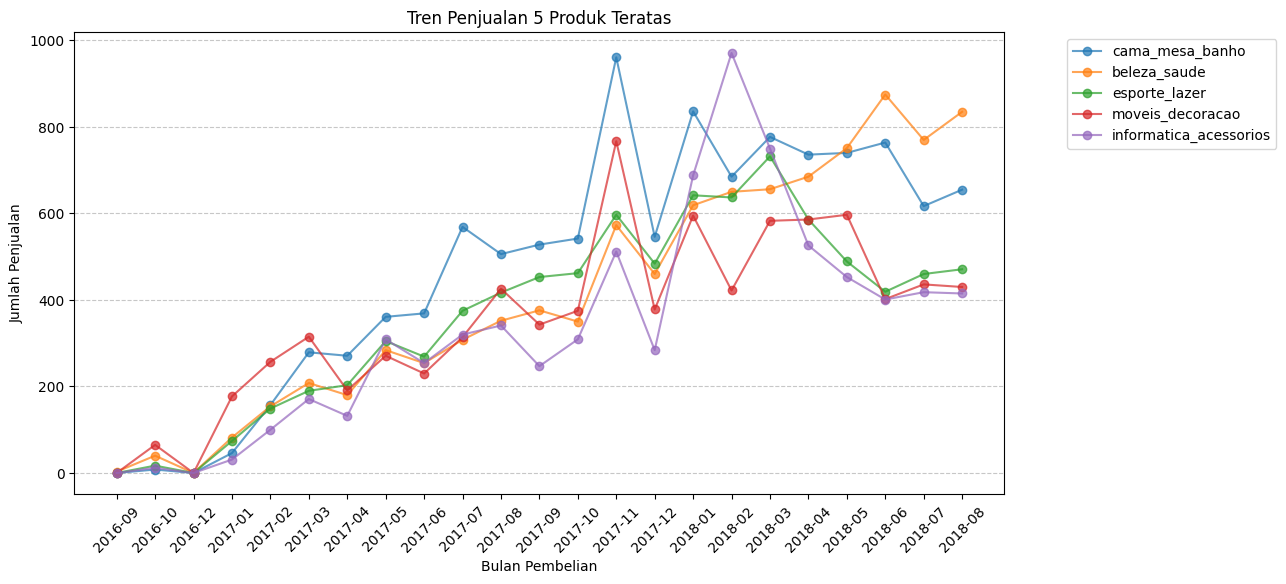

In [10]:
plt.figure(figsize=(12, 6))

merged_data['order_month'] = merged_data['order_month'].astype(str)
category_trends = merged_data.groupby(['order_month', 'product_category_name']).size().unstack(fill_value=0)
top_5_categories = category_trends.sum().nlargest(5).index
category_trends = category_trends[top_5_categories]

for category in category_trends.columns:
    plt.plot(category_trends.index, category_trends[category], label=category, marker='o', alpha=0.7)

plt.xlabel('Bulan Pembelian')
plt.ylabel('Jumlah Penjualan')
plt.title('Tren Penjualan 5 Produk Teratas')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Memindahkan legenda agar lebih rapi
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Pertanyaan 2:

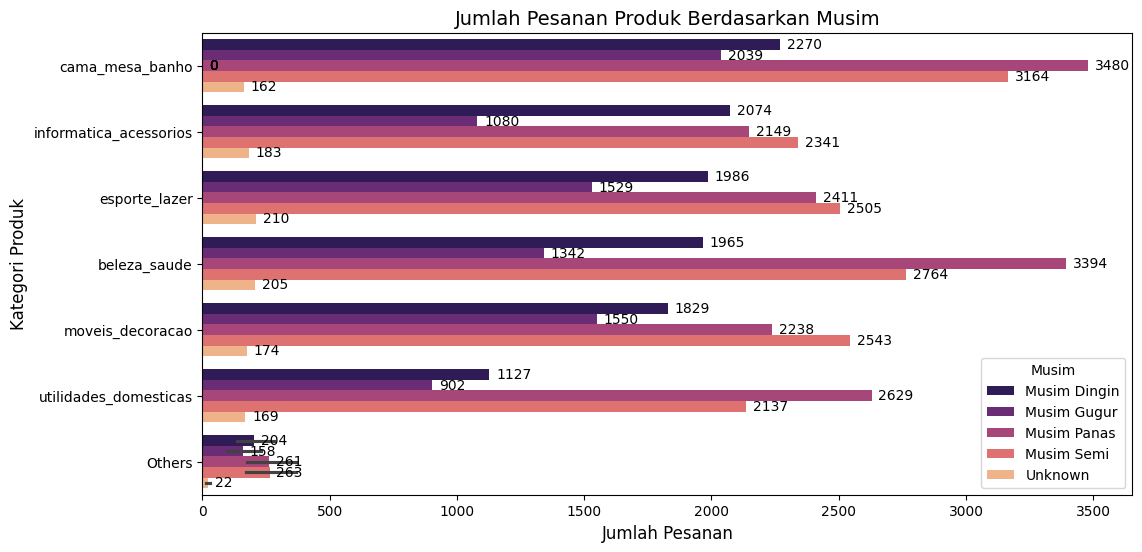

In [21]:
category_sales = category_sales.sort_values(by=["season", "total_orders"], ascending=[True, False])

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=category_sales,
    x="total_orders", y="product_category_name", hue="season",
    palette="magma"
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.xlabel("Jumlah Pesanan", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.title("Jumlah Pesanan Produk Berdasarkan Musim", fontsize=14)
plt.legend(title="Musim", fontsize=10)

plt.show()

###**Insight**

---
- Kategori produk tertentu lebih populer dibanding lainnya.
- Ada variasi signifikan dalam nilai transaksi berdasarkan metode pembayaran.


## Analisis Lanjutan (Opsional)

### **Conculsion**

---

1. Tren Penjualan Berdasarkan Kategori Produk:

* Analisis menunjukkan bahwa tren penjualan bervariasi antar kategori produk sepanjang tahun, dengan beberapa kategori menunjukkan pola musiman yang jelas.
* Kategori seperti "cama_mesa_banho" (perlengkapan tempat tidur, meja, dan mandi) dan "beleza_saude" (kecantikan dan kesehatan) memiliki volume penjualan yang tinggi secara konsisten sepanjang tahun.
* Beberapa kategori lain menunjukkan lonjakan penjualan pada periode tertentu, yang mengindikasikan bahwa produk tersebut memiliki sifat musiman.
* Wawasan ini dapat membantu bisnis dalam merencanakan strategi pemasaran, pengelolaan inventaris, dan promosi berdasarkan pola permintaan sepanjang tahun.

2. Produk Terlaris di Setiap Musim
Analisis musiman mengungkapkan bahwa pola pembelian konsumen berubah tergantung pada musim, yang terlihat dari jumlah pesanan berdasarkan kategori produk.

* Musim Dingin:
Kategori "electronics" dan "beauty" mengalami peningkatan penjualan.
Permintaan untuk produk kecantikan kemungkinan meningkat karena adanya promosi akhir tahun dan perayaan musim dingin.
Produk elektronik seperti pemanas atau perangkat hiburan juga menjadi pilihan utama selama musim dingin.

* Musim Panas:
Kategori "fashion" dan "toys" menjadi lebih populer, mencerminkan peningkatan aktivitas luar ruangan dan persiapan liburan.
Produk mainan mengalami lonjakan penjualan, kemungkinan karena liburan sekolah yang menyebabkan peningkatan belanja untuk anak-anak.

* Wawasan Bisnis:
  - Menyesuaikan strategi pemasaran dengan kategori yang mengalami lonjakan permintaan di setiap musim.
  - Mengelola inventaris secara efisien agar stok tidak berlebihan atau kekurangan saat permintaan musiman meningkat.
  - Membuat promosi bertarget, misalnya diskon untuk produk elektronik di musim dingin atau pakaian musim panas menjelang liburan.